<a href="https://colab.research.google.com/github/Anbazhagan1912/Anbazhagan1912/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [5]:
diabetes_df = pd.read_csv("/content/diabetes.csv")

In [6]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
diabetes_df.shape

(768, 9)

In [9]:
diabetes_df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [10]:
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [11]:
diabetes_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = diabetes_df_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN) 

In [13]:
diabetes_df_copy.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False,False


In [14]:
diabetes_df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabf8550bd0>,
      dtype=object)

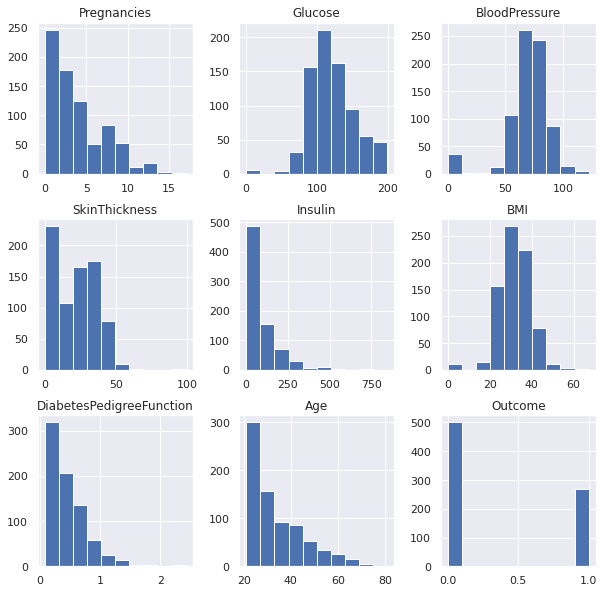

In [15]:
diabetes_df.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabf8066210>,
      dtype=object)

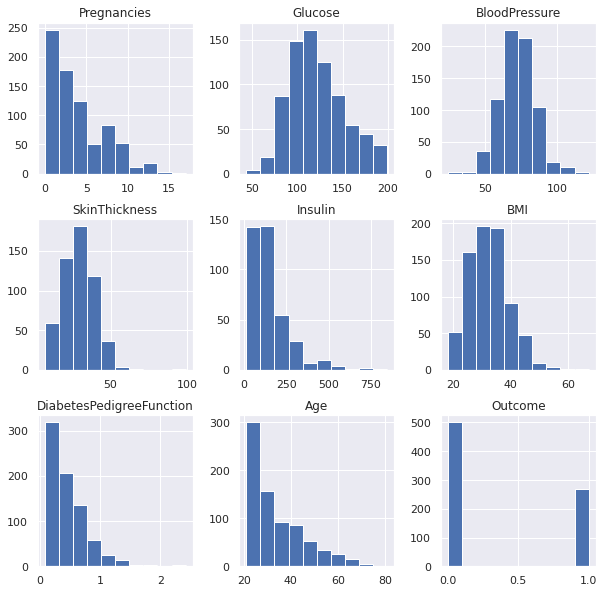

In [16]:
diabetes_df_copy.hist(figsize=(10,10))

In [17]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

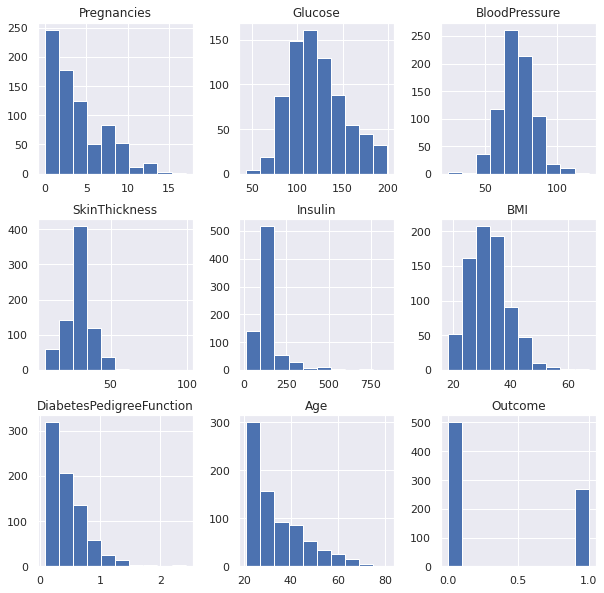

In [18]:
p = diabetes_df_copy.hist(figsize = (10,10))


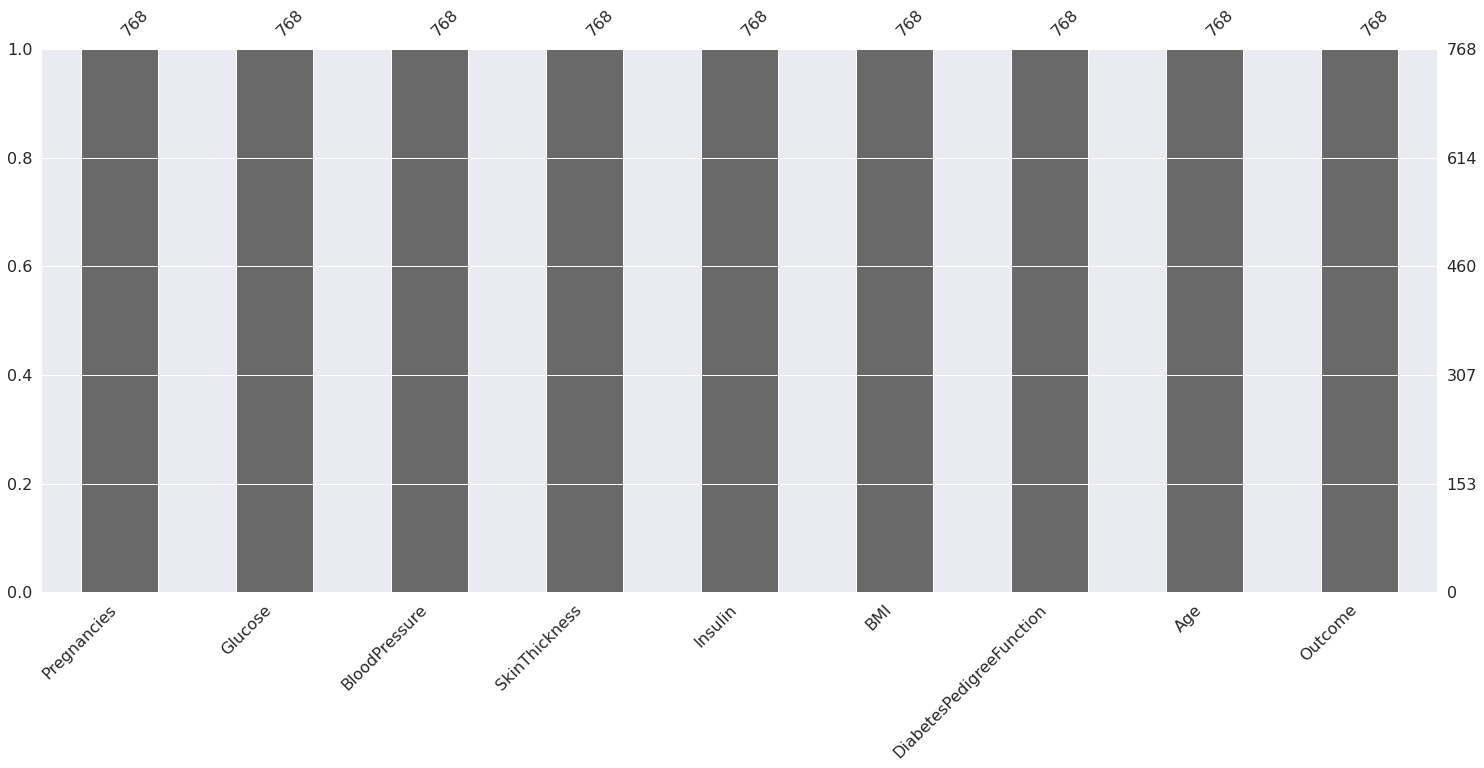

In [19]:
p = msno.bar(diabetes_df_copy)


In [20]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


(<matplotlib.axes._subplots.AxesSubplot at 0x7fabf7327190>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fabf7327190>)

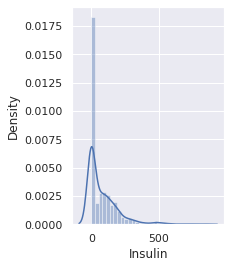

In [21]:
plt.subplot(121) , sns.distplot(diabetes_df["Insulin"])

In [22]:
y = diabetes_df_copy["Outcome"]


In [23]:
X = diabetes_df.drop("Outcome",axis=1)

In [24]:
Y = diabetes_df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier


In [26]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=7)

In [27]:
ran =RandomForestClassifier()

In [28]:
ran.fit(X_train,Y_train)

RandomForestClassifier()

In [29]:
ran_train = ran.predict(X_train)

In [30]:
from sklearn import metrics

In [31]:
print("The Accuracy Score is:",metrics.accuracy_score(Y_train,ran_train))

The Accuracy Score is: 1.0


In [32]:
ran_test = ran.predict(X_test)

In [33]:
print("The Accuracy score of Texting data is:",metrics.accuracy_score(Y_test,ran_test))

The Accuracy score of Texting data is: 0.7677165354330708


In [34]:
from sklearn.metrics import classification_report , confusion_matrix 


print(confusion_matrix(Y_test, ran_test))
print(classification_report(Y_test,ran_test))


[[137  25]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.70      0.63      0.66        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.76      0.77      0.76       254



In [35]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier()

In [36]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [37]:
tree_train = tree.predict(X_train)

In [38]:
print("Accracy of ",metrics.accuracy_score(tree_train,Y_train))

Accracy of  1.0


In [39]:

test_tree = tree.predict(X_test)
print("The Accuracy of Decition tree is ::",format(metrics.accuracy_score(test_tree,Y_test)))

The Accuracy of Decition tree is :: 0.6968503937007874


In [40]:
from sklearn.svm import SVC

sv_mechine = SVC()
sv_mechine.fit(X_train,Y_train)


SVC()

In [41]:
sv_test = sv_mechine.predict(X_test)
print("The accuracy of SVM:",metrics.accuracy_score(sv_test,Y_test))

The accuracy of SVM: 0.7480314960629921


In [42]:
ran.feature_importances_


array([0.07787806, 0.25131207, 0.08619564, 0.07562397, 0.07264838,
       0.16469277, 0.1317431 , 0.13990601])

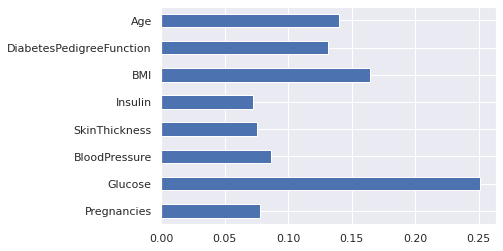

In [43]:
(pd.Series(ran.feature_importances_, index=X.columns).plot(kind='barh'))

In [44]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(ran)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [45]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
ran.predict([[1,85,66,29,0,26.6,0.351,31]])

array([0])